# 삼성카드 공모전 / SCDC

### 데이터 명명 규칙

- df 
- df_e 
- df_x 
- df_y 
- df_x_n
- df_predict


### 환경설정

In [40]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
# 데이터 인덱스 뷰 키우기
pd.set_option('display.max_row', 600)
pd.set_option('display.max_columns', 300)

# 모든 데이터 내용 다 보이게하기
pd.set_option('display.max_colwidth', 50)
#pd.set_option('display.max_colwidth', None)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '20200904.ipynb',
 'SCDC 과제 계획서.pptx',
 'SCDC+INFORMATION (1).pdf',
 '[Track1_데이터1] mrc_info.csv',
 '[Track1_데이터2] samp_train.csv',
 '[Track1_데이터3] samp_cst_feat.csv',
 '[Track1_데이터4] variable_dtype.xlsx',
 '[기타] SCDC_공모전 테이블 설명.xlsx',
 '최종실행코드.ipynb']

In [2]:
df1 = pd.read_csv("./data/[Track1_데이터1] mrc_info.csv", encoding='cp949')
df2 = pd.read_csv("./data/[Track1_데이터2] samp_train.csv")
df3 = pd.read_csv("./data/[Track1_데이터3] samp_cst_feat.csv")

### 데이터 파악

In [4]:
df3.describe()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
count,1.012400e+04,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,...,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000
mean,9.000023e+10,-0.003885,0.484221,0.031501,-0.024218,0.174790,0.147274,0.499152,0.040759,0.519672,...,0.040473,-0.029356,-0.020689,-0.021676,-0.043900,-0.022023,-0.012452,-0.013461,-0.012979,0.108977
std,1.328699e+05,0.078605,0.289560,0.191960,0.152056,0.255651,0.354396,0.291301,0.238548,0.288771,...,0.332091,0.298928,0.131485,0.136662,0.356804,0.144375,0.095042,0.119907,0.222926,0.218093
min,9.000000e+10,-0.149210,0.000000,-0.372920,-0.401530,-0.548990,0.000000,0.000300,-0.397870,0.000200,...,-0.563020,-0.626250,-0.363750,-0.353290,-0.741050,-0.398630,-0.220150,-0.303640,-0.467600,-0.605860
25%,9.000011e+10,-0.045090,0.232800,-0.103395,-0.101340,-0.001733,0.000000,0.240575,-0.133587,0.270150,...,-0.245655,-0.293895,-0.081338,-0.090155,-0.360805,-0.085207,-0.059973,-0.062948,-0.198983,-0.052858
50%,9.000023e+10,-0.018645,0.476750,-0.027615,-0.002925,0.199040,0.000000,0.501350,-0.038720,0.529700,...,-0.017425,0.022250,0.002720,-0.003550,0.007460,-0.004605,-0.024280,0.000355,-0.015095,0.130155
75%,9.000034e+10,0.011810,0.733425,0.126370,0.065545,0.376333,0.000000,0.759175,0.169905,0.773300,...,0.337570,0.229442,0.051400,0.059203,0.257642,0.055200,0.014600,0.034780,0.163442,0.284427
max,9.000046e+10,0.806840,1.000000,0.816550,0.693810,0.768420,1.000000,0.999000,0.765570,1.000000,...,0.717310,0.539590,0.748260,0.846510,0.668910,0.642780,0.679440,0.690920,0.655520,0.701840


In [5]:
df3.columns

Index(['cst_id_di', 'VAR002', 'VAR003', 'VAR004', 'VAR005', 'VAR006', 'VAR007',
       'VAR008', 'VAR009', 'VAR010',
       ...
       'VAR218', 'VAR219', 'VAR220', 'VAR221', 'VAR222', 'VAR223', 'VAR224',
       'VAR225', 'VAR226', 'VAR227'],
      dtype='object', length=227)

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124 entries, 0 to 10123
Columns: 227 entries, cst_id_di to VAR227
dtypes: float64(198), int64(29)
memory usage: 17.5 MB


In [4]:
df3

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [5]:
df2

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
...,...,...
10119,90000460112,7
10120,90000460117,0
10121,90000460233,0
10122,90000460310,0


In [6]:
df3['cst_id_di']

0        90000000089
1        90000000176
2        90000000210
3        90000000212
4        90000000213
            ...     
10119    90000460112
10120    90000460117
10121    90000460233
10122    90000460310
10123    90000460313
Name: cst_id_di, Length: 10124, dtype: int64

In [7]:
key = pd.merge(df2, df1, on = "MRC_ID_DI")

In [11]:
key

,cst_id_di,MRC_ID_DI,Category
0,90000000089,0,미이용
1,90000000210,0,미이용
2,90000000263,0,미이용
3,90000000322,0,미이용
4,90000000354,0,미이용
...,...,...,...
10119,90000348711,4,전문몰
10120,90000370385,4,전문몰
10121,90000413012,4,전문몰
10122,90000422706,4,전문몰


In [5]:
df = pd.merge(key, df3, on = "cst_id_di")

In [13]:
df

,cst_id_di,MRC_ID_DI,Category,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000348711,4,전문몰,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,90000370385,4,전문몰,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,90000413012,4,전문몰,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,90000422706,4,전문몰,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [14]:
df.isnull().sum()
## null 데이터 없음

cst_id_di    0
MRC_ID_DI    0
Category     0
VAR002       0
VAR003       0
VAR004       0
VAR005       0
VAR006       0
VAR007       0
VAR008       0
VAR009       0
VAR010       0
VAR011       0
VAR012       0
VAR013       0
VAR014       0
VAR015       0
VAR016       0
VAR017       0
VAR018       0
VAR019       0
VAR020       0
VAR021       0
VAR022       0
VAR023       0
VAR024       0
VAR025       0
VAR026       0
VAR027       0
VAR028       0
VAR029       0
VAR030       0
VAR031       0
VAR032       0
VAR033       0
VAR034       0
VAR035       0
VAR036       0
VAR037       0
VAR038       0
VAR039       0
VAR040       0
VAR041       0
VAR042       0
VAR043       0
VAR044       0
VAR045       0
VAR046       0
VAR047       0
VAR048       0
VAR049       0
VAR050       0
VAR051       0
VAR052       0
VAR053       0
VAR054       0
VAR055       0
VAR056       0
VAR057       0
VAR058       0
VAR059       0
VAR060       0
VAR061       0
VAR062       0
VAR063       0
VAR064       0
VAR065    

In [15]:
df

,cst_id_di,MRC_ID_DI,Category,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000348711,4,전문몰,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,90000370385,4,전문몰,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,90000413012,4,전문몰,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,90000422706,4,전문몰,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [16]:
df['Category'].value_counts()

미이용        8200
홈쇼핑         976
오픈마켓_소셜     661
종합몰         175
전문몰          70
종합물          42
Name: Category, dtype: int64

In [17]:
df['MRC_ID_DI'].value_counts()

0     8200
7      661
6      554
8      337
5      143
1       85
9       59
3       32
10      28
2       14
4       11
Name: MRC_ID_DI, dtype: int64

In [9]:
df = df.rename({"cst_id_di":"고객관리번호", 'MRC_ID_DI':"label", 'Category':"업종"}, axis=1)

In [11]:
df.head(100)

,고객관리번호,label,업종,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,0,미이용,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000210,0,미이용,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,90000000263,0,미이용,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,90000000322,0,미이용,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,90000000354,0,미이용,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
5,90000000407,0,미이용,-0.05230,0.8113,0.15073,-0.13863,0.29000,0,0.7609,...,0.34169,-0.31556,-0.05619,-0.12529,-0.33037,-0.14996,-0.11212,-0.06738,-0.13817,0.23949
6,90000000408,0,미이용,0.01857,0.4810,0.23696,-0.10609,0.35089,1,0.4149,...,0.40550,-0.38249,-0.03346,-0.09783,-0.36728,-0.02534,-0.03302,-0.01098,-0.09301,0.29357
7,90000000529,0,미이용,-0.03524,0.4005,-0.13904,0.14661,-0.10339,0,0.9348,...,-0.22203,0.33349,0.14327,0.15414,0.16596,0.16593,0.02951,0.03292,0.28011,-0.29552
8,90000000604,0,미이용,-0.01500,0.9910,0.55990,-0.30425,0.08286,0,0.3818,...,0.60862,-0.54149,-0.29730,-0.27381,-0.64158,-0.29302,-0.14089,-0.26949,-0.39133,0.30117
9,90000000606,0,미이용,0.07724,0.6547,0.70407,-0.16283,0.22325,0,0.5823,...,0.53548,-0.41174,-0.21514,-0.15185,-0.45631,-0.18653,-0.00930,-0.21110,-0.15886,0.09647


In [12]:
df_x = df.drop(["고객관리번호","업종","label"],axis = 1)

In [21]:
df_x

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
2,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0,0.7128,-0.13009,0.7291,-0.39929,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
3,0.02596,0.2279,0.09658,-0.21836,0.47897,0,0.1961,0.39811,0.2458,0.45440,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
4,0.03735,0.3486,-0.07106,0.05682,0.51936,1,0.6283,-0.11848,0.2781,0.20183,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,-0.06102,0.4577,-0.00078,0.03643,-0.08422,0,0.2038,-0.04045,0.8995,-0.03143,...,-0.06718,0.20808,-0.00682,0.03806,0.05194,-0.02781,-0.06693,0.01964,0.24685,-0.12737
10120,0.08022,0.1456,-0.09000,0.08134,0.18006,0,0.2014,-0.13644,0.9880,0.27385,...,-0.21824,0.06535,0.05611,0.06947,0.22530,0.01971,0.03257,0.01651,0.12013,0.12348
10121,0.00704,0.7367,0.14569,-0.01965,0.10966,0,0.7391,0.13386,0.9709,0.31793,...,0.10275,-0.02049,-0.05586,-0.01862,0.00152,-0.06403,-0.00941,-0.05569,0.18450,-0.05793
10122,-0.02005,0.3760,-0.21565,-0.02333,-0.22389,0,0.9906,-0.10244,0.8682,-0.31850,...,-0.32357,0.35647,0.05146,0.01153,0.31488,-0.01150,0.00885,0.07040,0.45774,-0.29717


In [13]:
df_y = df[['label']]

In [23]:
df_y

,label
0,0
1,0
2,0
3,0
4,0
...,...
10119,4
10120,4
10121,4
10122,4


In [14]:
df_x.iloc[:,0]

0       -0.06610
1       -0.01048
2       -0.10778
3        0.02596
4        0.03735
          ...   
10119   -0.06102
10120    0.08022
10121    0.00704
10122   -0.02005
10123   -0.01642
Name: VAR002, Length: 10124, dtype: float64

In [25]:
np.sort(df_x.iloc[:,0])

array([-0.14921, -0.14349, -0.13842, ...,  0.67422,  0.72609,  0.80684])

In [ ]:
df_x.iloc[:,0:100].boxplot(figsize=(150,10))

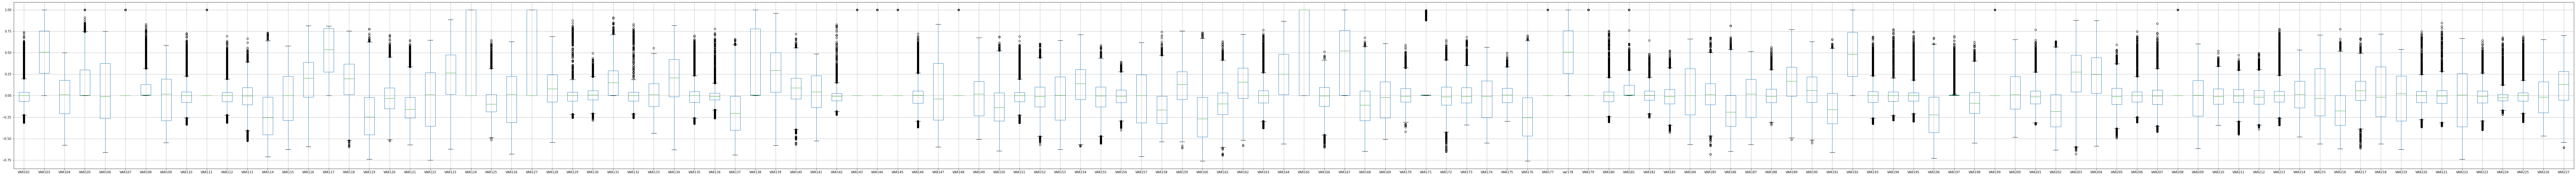

In [17]:
df_x.iloc[:,100:].boxplot(figsize=(150,10))

## 독립변수 특성 파악

### 0,1

1. 대부분 0이 많음

In [15]:
f_list = [7,15,18,26,59,66,67,70,71,77,78,94,96,97,98,107,111,124,127,143,144,145,148,177,179,199,208]
f1_list = [(i-2) for i in f_list]
df_x.iloc[:,f1_list]

## 결과 : f1_list 는 0,1 데이터만 존재

,VAR007,VAR015,VAR018,VAR026,VAR059,VAR066,VAR067,VAR070,VAR071,VAR077,...,VAR124,VAR127,VAR143,VAR144,VAR145,VAR148,VAR177,VAR179,VAR199,VAR208
0,0,1,0,0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10120,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10121,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10122,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
df_x['VAR007'].value_counts()

0    8633
1    1491
Name: VAR007, dtype: int64

In [35]:
for i in range(len(f1_list)):
    print(df_x.iloc[:,f1_list].iloc[:,i].value_counts())

0    8633
1    1491
Name: VAR007, dtype: int64
0    5430
1    4694
Name: VAR015, dtype: int64
0    8009
1    2115
Name: VAR018, dtype: int64
0    9926
1     198
Name: VAR026, dtype: int64
0    7606
1    2518
Name: VAR059, dtype: int64
0    7324
1    2800
Name: VAR066, dtype: int64
1    8723
0    1401
Name: VAR067, dtype: int64
0    8166
1    1958
Name: VAR070, dtype: int64
0    9314
1     810
Name: VAR071, dtype: int64
0    8769
1    1355
Name: VAR077, dtype: int64
0    9738
1     386
Name: VAR078, dtype: int64
0    9515
1     609
Name: VAR094, dtype: int64
0    9158
1     966
Name: VAR096, dtype: int64
0    8956
1    1168
Name: VAR097, dtype: int64
0    9306
1     818
Name: VAR098, dtype: int64
0    8434
1    1690
Name: VAR107, dtype: int64
0    7949
1    2175
Name: VAR111, dtype: int64
0    7452
1    2672
Name: VAR124, dtype: int64
0    7249
1    2875
Name: VAR127, dtype: int64
0    9952
1     172
Name: VAR143, dtype: int64
0    9485
1     639
Name: VAR144, dtype: int64
0    8960
1  

### var171

1. 0.0000xxx
2. 0.8~0.99 

In [27]:
df_x[["VAR171"]].sort_values(by=["VAR171"])

,VAR171
5664,0.0000
5187,0.0000
2105,0.0000
614,0.0000
7549,0.0000
...,...
5235,0.9916
8694,0.9916
6838,0.9918
9407,0.9918


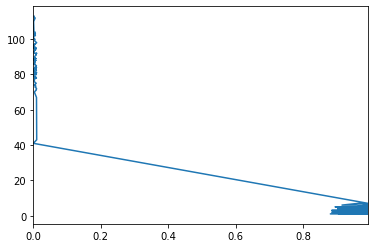

In [28]:
df_x['VAR171'].value_counts().plot()

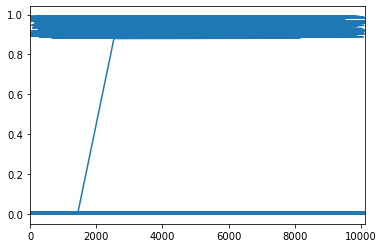

In [43]:
df_x['VAR171'].sort_values().plot()

### 종속변수에 따른 독립변수

In [114]:
df_e

,label,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,0,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,1,0.9484,0.2087,0,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,0.0888,-0.44394,-0.17265,-0.10508,0.17664,0.40249,-0.08707,-0.17389,0.01949,-0.41371,-0.57989,-0.25015,-0.55024,0.18196,0.47434,0.25285,-0.60139,0,-0.42087,-0.58665,0.7663,-0.31002,0.19040,-0.08291,0,1,0.41910,0.85724,0,0,-0.05205,-0.13230,-0.14272,0.16981,-0.39866,0,0,-0.26419,-0.36103,0.13387,-0.03264,-0.11995,0.0024,0.11094,-0.07028,0.21423,-0.11218,0.54909,0.0090,-0.53048,-0.25263,0.54955,0,-0.50093,0

In [117]:
df_e['label'].value_counts()

0     8200
7      661
6      554
8      337
5      143
1       85
9       59
3       32
10      28
2       14
4       11
Name: label, dtype: int64

In [118]:
df_e[df_e['label']==4]

,label,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
10113,4,-0.02685,0.4453,-0.02054,0.09639,0.11117,0,0.1415,-0.07147,0.8982,0.27254,0.02148,-0.31916,-0.23407,1,0.5413,0.8040,0,-0.39994,0.00573,-0.19874,-0.09385,-0.02650,-0.07353,-0.06262,0,0.11091,0.59213,0.05073,0.04853,0.2443,-0.29506,-0.02026,-0.10740,-0.12458,0.0942,0.13845,0.28188,0.38874,-0.02886,-0.13881,0.5390,-0.01185,-0.01046,0.01780,-0.11687,-0.02345,-0.06820,-0.25369,-0.03573,-0.23305,-0.33381,0.00883,-0.37108,-0.02322,-0.10821,0.24504,-0.29882,1,0.00941,-0.24002,0.5898,-0.13757,-0.02986,-0.05766,0,1,0.27412,0.27795,0,0,0.02406,0.25072,0.01407,-0.01027,-0.01247,1,0,-0.03008,0.08597,-0.07841,0.09341,0.01727,0.3211,0.36390,-0.00013,-0.17245,0.00497,0.12555,0.9231,-0.01940,-0.15884,-0.06177,0,-0.20072,0,0,0,0.04665,0.07551,0.5396,-0.00149,0.6785,0.10177,0.0046,-0.05114,1,0.0008,-0.02517,0.01132,0,-0.00276,0.01401,-0.39238,0.14735,0.06554,0.8087,0.25933,-0.42355,0.25507,0.06519,0.10358,0.20573,0,0.25989,0.04091,0,0.02902,0.03225,-0.04197,0.2413,0.02649,-0.16233,0.06562,0.03746,0.00800,-0.39042,0.8992,0.44624,0.12151,0.02409,0.20614,0,1,0,0.04043,-0.08758,0,0.38789,-0.23638,-0.00697,0.02564,0.13595,0.49403,0.02735,0.03894,0.10170,-0.22068,0.14872,-0.44140,-0.33857,0.31972,0.00694,0.41319,1,0.05919,0.7394,0.15722,-0.09022,-0.04040,0.0045,0.03833,-0.14438,-0.03544,-0.01125,-0.36616,0,0.2209,0,0.04149,0.2040,-0.02253,0.06504,-0.06720,-0.15818,-0.34037,0.02478,-0.05476,0.40716,0.06628,-0.41654,0.0098,0.03623,0.03472,0.60876,-0.35858,0.0091,-0.37265,0,0.02363,0.05444,-0.34419,0.46937,0.36070,-0.03111,0.03868,0.07238,0,-0.09216,-0.01186,0.03288,-0.05307,0.00109,-0.15792,-0.07389,-0.01607,0.18562,-0.11770,0.05573,0.01269,0.06562,0.03744,0.00604,0.05956,-0.01096,0.17254,0.20093
10114,4,-0.09225,0.4357,-0.05799,0.15348,-0.36023,0,0.0119,-0.27520,0.9534,-0.39115,-0.38877,0.35292,0.24206,1,0.2915,0.8136,0,0.37305,0.07315,-0.43926,-0.20526,-0.00744,-0.21088,-0.27517,0,-0.36807,-0.11859,0.18215,0.09287,0.5592,0.17162,-0.08854,-0.41278,0.08062,0.1838,0.25684,-0.05925,-0.13912,0.09200,0.03615,0.5319,0.41788,0.08395,0.05128,-0.25323,-0.37046,-0.20567,-0.02877,-0.04802,0.01999,0.26288,0.23551,0.24082,-0.09807,-0.36063,-0.02504,0.32212,0,0.33676,0.28472,0.6476,0.07155,-0.20046,-0.12475,0,0,-0.21175,-0.41899,0,0,0.01021,0.30474,0.11913,-0.22133,0.23781,0,0,0.04601,0.36316,-0.22903,0.31142,0.07604,0.0019,0.11358,0.00394,-0.23296,0.03138,-0.33318,0.0004,0.42707,0.01871,-0.49133,0,0

In [119]:
df_e[df_e['label']==2]

,label,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
10099,2,0.19042,0.3294,-0.00844,0.00270,-0.12831,0,0.0867,-0.09517,0.7268,0.16567,0.08805,-0.11094,0.11866,1,0.5280,0.7599,0,0.06075,0.03831,-0.13258,0.14936,0.04061,-0.20344,-0.19591,0,-0.06715,-0.22420,0.16918,-0.01643,0.8722,0.13942,-0.07062,-0.22282,-0.05943,0.8517,0.01333,-0.39423,0.03226,-0.03944,-0.28102,0.3235,0.22068,0.03859,0.04715,-0.11758,-0.17497,-0.17235,0.25789,-0.14380,-0.01948,0.26034,-0.40181,0.01623,0.28689,-0.25267,0.08346,0.20495,0,-0.06508,0.10287,0.0343,0.30349,-0.16246,0.00936,0,1,-0.24208,0.19257,0,0,0.50804,-0.28738,0.02907,-0.05250,0.14177,0,0,0.14685,0.01760,-0.09456,0.01282,0.02352,0.0015,-0.04284,0.04241,0.24107,0.05043,0.13688,0.0006,-0.14398,0.12904,-0.27904,0,0.04786,0,1,0,0.01505,-0.00491,0.4522,0.03569,0.8060,0.09091,0.0070,-0.28535,0,0.4054,0.08146,-0.01640,0,0.05339,0.00299,0.18213,0.17194,0.09590,0.5928,-0.06107,0.06219,-0.08252,-0.07880,0.21279,0.02618,0,-0.00839,0.22881,0,0.01327,0.01528,-0.08087,0.4005,0.01610,-0.02453,0.21142,0.02672,-0.00911,0.15430,0.6420,0.03414,-0.21373,-0.23296,0.43438,0,0,1,0.01316,-0.22541,0,0.59343,-0.01198,0.12871,-0.18747,0.10255,-0.15208,-0.00214,0.00456,0.20305,0.23035,-0.29333,0.18674,-0.04440,-0.35098,0.03860,-0.01167,0,-0.10656,0.0030,-0.16987,0.16540,-0.03643,0.0035,-0.05004,0.01153,0.16092,-0.10568,0.16495,0,0.9398,1,-0.00692,0.0043,-0.07685,-0.16429,-0.18940,0.09265,0.09718,-0.01271,0.14117,0.11644,0.26584,0.12050,0.7184,0.02381,0.02102,0.01476,0.13003,0.0020,-0.18848,0,-0.18107,-0.02972,-0.06691,-0.10267,-0.22620,0.11433,0.03050,0.00526,0,0.29971,-0.01938,0.10919,0.06090,0.04991,-0.13344,-0.14191,-0.11413,0.16979,-0.21457,0.09662,0.03490,-0.00785,0.22537,0.03634,0.29862,0.08988,0.08030,0.13299
10100,2,-0.02758,0.3081,-0.07396,0.05859,-0.06035,0,0.9630,-0.02879,0.8485,0.15261,-0.13792,-0.22369,-0.11989,0,0.9439,0.6237,0,-0.36233,0.01178,-0.23282,-0.09301,-0.02578,-0.08023,-0.03638,0,0.10077,0.40305,-0.01360,0.05880,0.4864,-0.14953,-0.06588,-0.15346,-0.07962,0.4963,0.07759,0.19268,0.26066,0.06430,-0.06518,0.5323,-0.02879,0.02625,0.00017,-0.29249,-0.18231,-0.20072,-0.28559,-0.17628,-0.06003,-0.20239,-0.05984,-0.28735,-0.01248,-0.19782,0.16561,-0.20819,0,0.19845,-0.04580,0.5002,-0.11775,0.12657,-0.02775,0,1,0.15299,0.13990,0,0,-0.00192,0.15914,0.03249,-0.04873,0.40017,0,0,0.35906,0.06769,-0.10218,0.07876,0.01033,0.5293,0.23375,0.00090,-0.24178,0.00898,-0.00886,0.0014,0.00182,-0.18664,-0.05248,0,0

In [121]:
df_e.groupby('label').sum()

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-7.82365,4284.8718,432.68931,-332.42794,1753.66341,1360,4122.2382,564.62460,4000.0142,2283.40843,1691.44262,-1713.36794,-1802.82583,3819,3882.8232,3859.2670,1760,-1631.77209,-197.72222,681.87615,437.33433,-135.24211,581.87089,580.08037,144,1684.69470,1165.32311,-399.11137,-240.64085,4098.2510,-1645.72372,-77.13147,636.97175,-1368.06729,4129.2648,-376.74186,1301.00455,1670.24929,-54.45753,-669.37901,3140.5548,-737.16649,-270.09956,-187.49927,418.91107,669.21476,18.98827,-412.38129,90.19704,-1179.62005,-1916.72453,-721.05085,-1681.36859,601.77959,671.68301,581.73968,-2030.22086,2062,-1479.99091,-1815.27986,4152.7992,-1013.08290,112.17865,-14.68666,2076,7031,1428.60436,2654.37610,1654,731,-149.68660,-470.19737,-229.20370,267.99134,-1339.85822,992,272,-807.37636,-481.37426,392.19170,-363.25761,-219.34085,1579.7872,165.73752,-99.40910,838.74617,-183.26760,1830.62318,982.2926,-1842.49678,-858.52984,878.52847,480,-1553.45134,732,872,757,-244.64836,-314.29031,2444.2402,-229.15400,3999.7278,-512.16852,1132.8627,915.76463,1555,781.5975,-558.16359,-266.56914,1649,-226.64178,-325.64340,-2060.15845,-727.09587,1808.34051,3852.2597,1646.28128,-2107.97035,-302.25293,-1170.44385,-820.20121,2352.85167,1989,-732.65424,-724.68335,2321,862.45613,-221.69832,116.84483,1385.6498,-232.75432,334.83879,1917.17911,-269.34182,-142.56062,-1767.70426,2215.5061,2593.96175,637.33475,519.24743,-195.28055,144,561,1024,-287.09568,889.09896,1148,-508.68826,-1189.14111,-228.50915,-196.84822,-688.05890,1006.00214,-451.41172,-78.28879,-816.83747,-1255.20766,1066.35712,-2182.68034,-857.05405,1311.82548,-292.42670,2131.19247,4053,-410.97737,3071.1491,-1075.80234,-527.40327,134.63240,943.6257,-163.23190,188.08724,-527.14809,145.98428,-2155.63703,1210,4021.3117,1369,-251.19738,508.0358,104.11928,-178.43545,746.64176,237.77573,-1535.70359,-539.40401,36.28369,1474.05430,706.12057,-1252.73112,4128.7138,-265.53300,-245.05459,-227.53239,-1994.42081,302.3251,-718.54763,1463,455.49622,-229.98238,-1619.72308,2421.80749,2200.19997,-202.62987,-259.46755,-320.86003,980,-490.56605,-49.54457,-160.95459,-239.97362,-259.31853,382.13951,740.92870,-1509.61593,398.67989,735.18699,-665.00974,-309.06262,-297

In [130]:
df_label_mean = df_e.groupby('label').mean().T
df_mean = pd.DataFrame(df_e.iloc[:,1:].mean())

In [131]:
df_label_mean['total_mean'] = df_mean.iloc[:,0]

In [149]:
df_label_mean

label,0,1,2,3,4,5,6,7,8,9,10,total_mean
VAR002,-0.000954,-0.008488,-0.022142,-0.023834,-0.028415,-0.018791,-0.013952,-0.017140,-0.017342,-0.019584,-0.023384,-0.003885
VAR003,0.522545,0.292496,0.317500,0.324944,0.375273,0.328275,0.335855,0.328312,0.300681,0.239951,0.287289,0.484221
VAR004,0.052767,-0.048929,-0.105429,-0.086014,-0.063433,-0.069221,-0.029131,-0.088687,-0.033863,-0.092230,-0.113298,0.031501
VAR005,-0.040540,0.030307,0.044045,0.053372,0.037995,0.038507,0.030076,0.055265,0.049381,0.080166,0.066269,-0.024218
VAR006,0.213861,0.125192,-0.112137,-0.083281,-0.114234,-0.033441,0.052193,-0.037614,0.069544,-0.137486,-0.136917,0.174790
VAR007,0.165854,0.141176,0.071429,0.031250,0.090909,0.055944,0.061372,0.065053,0.074184,0.084746,0.035714,0.147274
VAR008,0.502712,0.407564,0.608943,0.553081,0.494127,0.504878,0.488517,0.521854,0.423992,0.419122,0.338529,0.499152
VAR009,0.068857,-0.057819,-0.080781,-0.078017,-0.097676,-0.083351,-0.059884,-0.094775,-0.072954,-0.110199,-0.126152,0.040759
VAR010,0.487807,0.464105,0.692179,0.765469,0.919582,0.718499,0.631051,0.680793,0.631076,0.715208,0.720582,0.519672
VAR011,0.278464,0.091189,0.003906,0.023551,-0.013325,0.056960,0.072143,0.026329,0.068346,-0.029087,-0.046255,0.234824


In [161]:
df_label_mean.iloc[:,0]

VAR002   -0.000954
VAR003    0.522545
VAR004    0.052767
VAR005   -0.040540
VAR006    0.213861
VAR007    0.165854
VAR008    0.502712
VAR009    0.068857
VAR010    0.487807
VAR011    0.278464
VAR012    0.206273
VAR013   -0.208947
VAR014   -0.219857
VAR015    0.465732
VAR016    0.473515
VAR017    0.470642
VAR018    0.214634
VAR019   -0.198997
VAR020   -0.024112
VAR021    0.083156
VAR022    0.053333
VAR023   -0.016493
VAR024    0.070960
VAR025    0.070742
VAR026    0.017561
VAR027    0.205451
VAR028    0.142113
VAR029   -0.048672
VAR030   -0.029346
VAR031    0.499787
VAR032   -0.200698
VAR033   -0.009406
VAR034    0.077679
VAR035   -0.166837
VAR036    0.503569
VAR037   -0.045944
VAR038    0.158659
VAR039    0.203689
VAR040   -0.006641
VAR041   -0.081632
VAR042    0.382994
VAR043   -0.089898
VAR044   -0.032939
VAR045   -0.022866
VAR046    0.051087
VAR047    0.081612
VAR048    0.002316
VAR049   -0.050290
VAR050    0.011000
VAR051   -0.143856
VAR052   -0.233747
VAR053   -0.087933
VAR054   -0.

In [147]:
df_dev = df_label_mean.iloc[0].apply(lambda r : r - df_label_mean.iloc[-1])

In [159]:
a = df_label_mean.iloc[0]- df_label_mean.iloc[-1]

In [154]:
df_dev = pd.DataFrame
for i in range(0,11):
    df_dev[i] = df_label_mean.iloc[i]- df_label_mean.iloc[-1]

TypeError: 'type' object does not support item assignment

In [160]:
df_dev['추가'] = a

TypeError: 'type' object does not support item assignment

### 상관관계

In [82]:
df.corr().loc['VAR122','VAR222']

0.9899081153199158

In [72]:
df.corr() >= 0.7

,고객관리번호,label,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
고객관리번호,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
label,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [73]:
df.corr()['VAR215']

고객관리번호    0.004891
label    -0.316493
VAR002    0.125026
VAR003    0.642283
VAR004    0.841529
VAR005   -0.761252
VAR006    0.488889
VAR007    0.199469
VAR008    0.155229
VAR009    0.868334
VAR010   -0.412775
VAR011    0.620516
VAR012    0.473973
VAR013   -0.588192
VAR014   -0.450958
VAR015   -0.000792
VAR016    0.231078
VAR017   -0.416027
VAR018    0.066035
VAR019   -0.608454
VAR020   -0.726082
VAR021    0.887180
VAR022    0.220521
VAR023   -0.569893
VAR024    0.062981
VAR025    0.934346
VAR026   -0.013817
VAR027    0.442880
VAR028    0.427421
VAR029   -0.792685
VAR030   -0.679102
VAR031   -0.191712
VAR032   -0.526495
VAR033   -0.441878
VAR034    0.832185
VAR035   -0.501046
VAR036    0.155179
VAR037   -0.762832
VAR038    0.382730
VAR039    0.613510
VAR040    0.087496
VAR041   -0.403670
VAR042   -0.386663
VAR043   -0.947138
VAR044   -0.766040
VAR045   -0.748809
VAR046    0.630350
VAR047    0.802434
VAR048   -0.159948
VAR049   -0.143398
VAR050   -0.080771
VAR051   -0.544855
VAR052   -0.

In [76]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_top_abs_correlations1(df, p = 0.7):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr>p]

print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_x, 100))
print(get_top_abs_correlations1(df_x,0.9))

Top Absolute Correlations
VAR122  VAR222    0.989908
VAR106  VAR147    0.988323
VAR147  VAR222    0.988171
VAR122  VAR218    0.986607
VAR106  VAR222    0.986179
VAR122  VAR147    0.986029
VAR126  VAR147    0.985781
VAR093  VAR106    0.985739
        VAR215    0.984403
VAR115  VAR153    0.983560
VAR093  VAR184    0.983434
VAR043  VAR222    0.983009
VAR021  VAR115    0.982878
VAR157  VAR222    0.981574
VAR114  VAR160    0.981145
VAR093  VAR147    0.980801
VAR147  VAR218    0.980167
VAR115  VAR157    0.979974
VAR184  VAR215    0.979595
VAR106  VAR122    0.979569
VAR060  VAR076    0.979421
VAR122  VAR157    0.979210
VAR021  VAR153    0.978992
VAR218  VAR222    0.978966
VAR139  VAR203    0.978929
VAR043  VAR147    0.978463
VAR106  VAR126    0.977378
VAR043  VAR106    0.977300
        VAR093    0.976845
VAR014  VAR058    0.976289
VAR153  VAR219    0.974148
VAR012  VAR134    0.973396
VAR091  VAR216    0.973346
VAR126  VAR222    0.973146
VAR114  VAR176    0.972743
VAR106  VAR157    0.972434
  

In [212]:
corr_set= df_x.corr().abs().unstack().sort_values(ascending=False)
corr_set_index = corr_set[(corr_set>0.9) & (corr_set!=1)].index

In [113]:
#pd.DataFrame(corr_set[(corr_set>0.9) & (corr_set!=1)].iloc[range(0,100,2)]).head(100)
#pd.DataFrame(corr_set[(corr_set>0.9) & (corr_set!=1)]).head(100)

,,0
VAR222,VAR122,0.989908
VAR106,VAR147,0.988323
VAR222,VAR147,0.988171
VAR122,VAR218,0.986607
VAR106,VAR222,0.986179
VAR147,VAR122,0.986029
VAR126,VAR147,0.985781
VAR093,VAR106,0.985739
VAR215,VAR093,0.984403
VAR115,VAR153,0.983560


In [213]:
corr_set_index = corr_set_index[range(0,len(corr_set_index),2)]

In [214]:
remove_column = []
for all_index in corr_set_index:
    remove_column.append(all_index[0])
    print(all_index)

('VAR222', 'VAR122')
('VAR106', 'VAR147')
('VAR222', 'VAR147')
('VAR122', 'VAR218')
('VAR106', 'VAR222')
('VAR147', 'VAR122')
('VAR126', 'VAR147')
('VAR093', 'VAR106')
('VAR215', 'VAR093')
('VAR115', 'VAR153')
('VAR093', 'VAR184')
('VAR043', 'VAR222')
('VAR021', 'VAR115')
('VAR157', 'VAR222')
('VAR114', 'VAR160')
('VAR147', 'VAR093')
('VAR147', 'VAR218')
('VAR157', 'VAR115')
('VAR215', 'VAR184')
('VAR106', 'VAR122')
('VAR060', 'VAR076')
('VAR122', 'VAR157')
('VAR153', 'VAR021')
('VAR222', 'VAR218')
('VAR203', 'VAR139')
('VAR147', 'VAR043')
('VAR106', 'VAR126')
('VAR106', 'VAR043')
('VAR043', 'VAR093')
('VAR058', 'VAR014')
('VAR153', 'VAR219')
('VAR012', 'VAR134')
('VAR216', 'VAR091')
('VAR126', 'VAR222')
('VAR176', 'VAR114')
('VAR106', 'VAR157')
('VAR106', 'VAR218')
('VAR157', 'VAR147')
('VAR222', 'VAR093')
('VAR106', 'VAR219')
('VAR116', 'VAR123')
('VAR056', 'VAR047')
('VAR219', 'VAR147')
('VAR043', 'VAR122')
('VAR056', 'VAR115')
('VAR126', 'VAR093')
('VAR126', 'VAR122')
('VAR122', 'V

In [175]:
list(set(remove_column))

['VAR014',
 'VAR150',
 'VAR174',
 'VAR043',
 'VAR021',
 'VAR013',
 'VAR051',
 'VAR012',
 'VAR184',
 'VAR116',
 'VAR153',
 'VAR222',
 'VAR191',
 'VAR216',
 'VAR019',
 'VAR011',
 'VAR095',
 'VAR123',
 'VAR139',
 'VAR176',
 'VAR089',
 'VAR039',
 'VAR058',
 'VAR056',
 'VAR114',
 'VAR134',
 'VAR037',
 'VAR068',
 'VAR119',
 'VAR069',
 'VAR149',
 'VAR162',
 'VAR223',
 'VAR155',
 'VAR106',
 'VAR109',
 'VAR082',
 'VAR006',
 'VAR034',
 'VAR038',
 'VAR207',
 'VAR215',
 'VAR214',
 'VAR104',
 'VAR122',
 'VAR027',
 'VAR160',
 'VAR009',
 'VAR005',
 'VAR158',
 'VAR157',
 'VAR203',
 'VAR218',
 'VAR187',
 'VAR202',
 'VAR115',
 'VAR154',
 'VAR076',
 'VAR226',
 'VAR052',
 'VAR032',
 'VAR060',
 'VAR196',
 'VAR029',
 'VAR147',
 'VAR168',
 'VAR080',
 'VAR028',
 'VAR063',
 'VAR159',
 'VAR061',
 'VAR047',
 'VAR186',
 'VAR025',
 'VAR204',
 'VAR164',
 'VAR093',
 'VAR126',
 'VAR137',
 'VAR091',
 'VAR141',
 'VAR169',
 'VAR209',
 'VAR165',
 'VAR166',
 'VAR227',
 'VAR219']

In [215]:
df_remove_corr  = df_x.drop(list(set(remove_column)),axis=1)

In [216]:
df_remove_corr

,VAR002,VAR003,VAR004,VAR007,VAR008,VAR010,VAR015,VAR016,VAR017,VAR018,...,VAR208,VAR210,VAR211,VAR212,VAR213,VAR217,VAR220,VAR221,VAR224,VAR225
0,-0.06610,0.5280,-0.13607,0,0.7702,0.1981,1,0.0049,0.8085,0,...,0,0.24685,0.01432,-0.00966,0.09746,-0.13279,0.05449,0.09471,0.02938,0.17105
1,-0.01048,0.8360,0.37797,1,0.3257,0.7343,1,0.9484,0.2087,0,...,0,-0.10428,-0.15064,-0.20617,-0.19684,0.10863,-0.18568,-0.09755,-0.06314,-0.17111
2,-0.10778,0.0810,-0.12917,0,0.7128,0.7291,0,0.0035,0.8146,1,...,0,-0.03195,0.04440,-0.07044,0.05095,-0.18426,0.04098,0.06074,-0.06996,0.01552
3,0.02596,0.2279,0.09658,0,0.1961,0.2458,0,0.0018,0.6108,1,...,0,-0.07101,-0.30073,-0.04245,-0.16701,0.22094,-0.15050,-0.19061,-0.03939,-0.11918
4,0.03735,0.3486,-0.07106,1,0.6283,0.2781,0,0.8346,0.3488,0,...,0,-0.16282,0.01175,0.19874,0.05024,0.07830,0.09082,0.03790,0.41329,0.01658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,-0.06102,0.4577,-0.00078,0,0.2038,0.8995,1,0.4413,0.5838,0,...,0,-0.09274,0.12963,-0.09363,0.02993,0.21645,-0.00682,0.03806,-0.06693,0.01964
10120,0.08022,0.1456,-0.09000,0,0.2014,0.9880,0,0.4799,0.5893,0,...,0,0.09725,0.00546,0.00115,0.01380,-0.01551,0.05611,0.06947,0.03257,0.01651
10121,0.00704,0.7367,0.14569,0,0.7391,0.9709,1,0.4918,0.8140,0,...,0,-0.07140,-0.09976,-0.10309,-0.05483,0.30728,-0.05586,-0.01862,-0.00941,-0.05569
10122,-0.02005,0.3760,-0.21565,0,0.9906,0.8682,0,0.4718,0.6854,0,...,0,-0.01801,0.03425,0.14604,0.08803,0.12476,0.05146,0.01153,0.00885,0.07040


# 모델링

In [49]:
corr_set= df_x.corr().abs().unstack().sort_values(ascending=False)
corr_set_index = corr_set[(corr_set>0.7) & (corr_set!=1)].index
corr_set_index = corr_set[(corr_set>0.7) & (corr_set!=1)].index[range(0,len(corr_set_index),2)]
remove_column = []
for all_index in corr_set_index:
    remove_column.append(all_index[0])
df_remove_corr = df_x.drop(list(set(remove_column)),axis=1)

## 회귀분석

In [226]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)

#x_train, x_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)

In [147]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
#y_predict = mlr.predict(x_test)
#y_predict
mlr.score(x_train,y_train)

0.2747524830068724

### 랜덤포레스트

In [81]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=4, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)
forest.fit(x_train, y_train)
print(">> 원래")
print("train : ",forest.score(x_train,y_train))
print("test : ",forest.score(x_test,y_test))

print("\n>> 다중공선성 제거")
x_train, x_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)
forest = RandomForestClassifier(n_estimators=4, random_state=2)
forest.fit(x_train, y_train)
print("train : ",forest.score(x_train,y_train))
print("test : ",forest.score(x_test,y_test))

>> 원래
train :  0.9508581306334115
test :  0.782716049382716

>> 다중공선성 제거
train :  0.9504877145326583
test :  0.7782716049382716


In [18]:
feature_importance = forest.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_x.columns)
Series_feat_imp.sort_values(ascending=True)

VAR144    0.000016
VAR071    0.000124
VAR007    0.000141
VAR208    0.000168
VAR094    0.000177
VAR097    0.000211
VAR078    0.000221
VAR199    0.000311
VAR026    0.000312
VAR077    0.000326
VAR145    0.000345
VAR165    0.000412
VAR143    0.000492
VAR018    0.000537
VAR124    0.000619
VAR098    0.000651
VAR059    0.000714
VAR070    0.000797
VAR179    0.000815
VAR096    0.000838
VAR107    0.000872
VAR127    0.000908
VAR067    0.000973
VAR177    0.001006
VAR148    0.001073
VAR066    0.001184
VAR015    0.001247
VAR111    0.001301
VAR002    0.001888
VAR009    0.002202
VAR100    0.002393
VAR019    0.002499
VAR157    0.002504
VAR203    0.002580
VAR114    0.002585
VAR222    0.002618
VAR083    0.002765
VAR058    0.002777
VAR093    0.002789
VAR191    0.002813
VAR061    0.002862
VAR126    0.002943
VAR159    0.002967
VAR099    0.002986
VAR045    0.003006
VAR132    0.003124
VAR076    0.003153
VAR012    0.003175
VAR056    0.003193
VAR136    0.003199
VAR069    0.003242
VAR039    0.003256
VAR151    0.

In [59]:
feature_importance = forest.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_remove_corr.columns)
Series_feat_imp.sort_values(ascending=True)

VAR096    0.000000
VAR094    0.000000
VAR143    0.000304
VAR098    0.000499
VAR148    0.000627
VAR144    0.000678
VAR007    0.001137
VAR071    0.001655
VAR208    0.001761
VAR067    0.001883
VAR026    0.001941
VAR078    0.001972
VAR018    0.001974
VAR077    0.001993
VAR177    0.002026
VAR070    0.002033
VAR145    0.002366
VAR127    0.002534
VAR066    0.002651
VAR097    0.002705
VAR111    0.002792
VAR015    0.003408
VAR199    0.003590
VAR124    0.003804
VAR107    0.003915
VAR059    0.004192
VAR156    0.017813
VAR103    0.018002
VAR062    0.018262
VAR031    0.018791
VAR136    0.019918
VAR085    0.020392
VAR171    0.020411
VAR023    0.020452
VAR036    0.020456
VAR105    0.020773
VAR008    0.020815
VAR002    0.021475
VAR170    0.021508
VAR090    0.021893
VAR131    0.022489
VAR016    0.022495
var178    0.022509
VAR108    0.022959
VAR192    0.023232
VAR167    0.023250
VAR130    0.023346
VAR065    0.023409
VAR182    0.023678
VAR086    0.023919
VAR197    0.024635
VAR040    0.024960
VAR050    0.

### 나이브베이즈

가우시안 나이브베이즈

In [8]:
from sklearn.naive_bayes import *

In [77]:
# 가우시안 나이브베이즈
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)

gnb = GaussianNB()
gnb.fit(x_train,y_train)

print(">> 원래")
print("train : ",gnb.score(x_train,y_train))
print("test : ",gnb.score(x_test,y_test))

print("\n>> 다중공선성 제거")
x_train, x_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("train : ",gnb.score(x_train,y_train))
print("test : ",gnb.score(x_test,y_test))

>> 원래
train :  0.4728978886282257
test :  0.4414814814814815

>> 다중공선성 제거
train :  0.17150265464872205
test :  0.16197530864197532


multinomial 나이브베이즈

In [79]:
# df_x_n <- x 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x_n = scaler.fit_transform(df_x[:])

x_train_n, x_test_n, y_train, y_test = train_test_split(df_x_n, df_y, train_size=0.8, test_size=0.2)

mnb = MultinomialNB()
mnb.fit(x_train_n,y_train)


print(">> 원래")
print("train : ",mnb.score(x_train_n,y_train))
print("test : ",mnb.score(x_test_n,y_test))

print("\n>> 다중공선성 제거")
df_x_n = scaler.fit_transform(df_remove_corr[:])
x_train, x_test, y_train, y_test = train_test_split(df_x_n, df_y, train_size=0.8, test_size=0.2)
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print("train : ",mnb.score(x_train,y_train))
print("test : ",mnb.score(x_test,y_test))

>> 원래
train :  0.6714409186319299
test :  0.6730864197530865

>> 다중공선성 제거
train :  0.7746635387084825
test :  0.7767901234567901


### knn

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.8, test_size=0.2)


knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print(">> 원래")
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

print("\n>> 다중공선성 제거")
x_train, x_test, y_train, y_test = train_test_split(df_remove_corr, df_y, train_size=0.8, test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("train : ", knn.score(x_train,y_train))
print("test : ", knn.score(x_test,y_test))

>> 원래
0.8276330411161872
0.7896296296296297

>> 다중공선성 제거
train :  0.8201012470675392
test :  0.8004938271604938


# 비지도 학습

### kmeans 클러스터링

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df_x)
df_predict = df_x
labels = kmeans.labels_
predict = kmeans.predict(df_predict)
df_predict['cluster'] = predict
pd.tools.plotting.parallel_coordinates(df_predict, 'cluster')

AttributeError: module 'pandas' has no attribute 'tools'

In [ ]:
from sklearn.manifold import TSNE

X = df_predict['wv'].to_list()
y = df_predict['cluster'].to_list()

import os.path
import pickle

tsne_filepath = 'tsne3002.pkl'

# File Cache
if not os.path.exists(tsne_filepath):
    tsne = TSNE(random_state=42)
    tsne_points = tsne.fit_transform(X)
    with open(tsne_filepath, 'wb+') as f:
        pickle.dump(tsne_points, f)
else: # Cache Hits!
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)

tsne_df = pd.DataFrame(tsne_points, index=range(len(X)), columns=['x_coord', 'y_coord'])
tsne_df['user_bio'] = df_sfn_del['댓글내용'].to_list()
tsne_df['cluster_no'] = y

In [106]:
df_predict

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,cluster,real
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0,0
1,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,0.48315,-0.54935,-0.51582,1,0.9484,0.2087,0,-0.53819,-0.11899,0.44315,0.08992,-0.16218,0.08997,0.39791,0,0.50289,0.41403,-0.28066,-0.06560,0.8768,-0.52176,-0.19172,0.40686,-0.45094,0.5963,-0.01491,0.39867,0.59189,-0.05797,-0.25150,0.0888,-0.44394,-0.17265,-0.10508,0.17664,0.40249,-0.08707,-0.17389,0.01949,-0.41371,-0.57989,-0.25015,-0.55024,0.18196,0.47434,0.25285,-0.60139,0,-0.42087,-0.58665,0.7663,-0.31002,0.19040,-0.08291,0,1,0.41910,0.85724,0,0,-0.05205,-0.13230,-0.14272,0.16981,-0.39866,0,0,-0.26419,-0.36103,0.13387,-0.03264,-0.11995,0.0024,0.11094,-0.07028,0.21423,-0.11218,0.54909,0.0090,-0.53048,-0.25263,0.54955,0,-0.

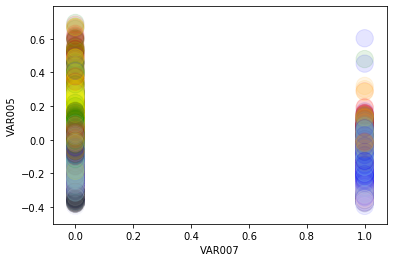

In [108]:
from sklearn.cluster import KMeans 
Kmean = KMeans(n_clusters=10)
Kmean.fit(df_x)
km = pd.DataFrame(df_x)
km['category'] = Kmean.labels_
colormap = { 0: 'red', 1: 'green', 2: 'blue', 3 : 'yellow', 4 : 'black', 5 : 'gray', 6 : 'pink', 7 : 'skyblue', 8: 'orange', 9 : 'white'}
colors = km.apply(lambda row: colormap[row.category], axis=1)
ax = km.plot(kind='scatter', x=5, y=3, alpha=0.1, s=300, c=colors)